</br>
<div style="display: flex; justify-content: space-between; align-items: flex-start; border-bottom: 2px solid #555555; padding-bottom: 15px; margin-bottom: -8px;">
    <div style="width: 50%;">
        <h2>
            <span style="color: #B30033;">▍</span>Práctica 1:
        </h2>
        <h1 style="margin-top: -10px;">
            Análisis, procesamiento y validación
        </h1>
    </div>
    <div style="width: 50%; text-align: right;">
        <div style="display: flex; justify-content: space-between; align-items: flex-start; margin-top: 30px;">
            <div style="width: 20%;"></div>
            <div style="width: 80%; border-left: 2px solid #555555; padding-left: 20px;">
                <div style="margin-bottom: 20px;">
                    <p style="margin: 0; font-size: 1.4em; font-weight: bold;">
                        Minería de Datos, 2025-26
                    </p>
                </div>
                <div style="margin-top: 8px; text-align: right;">
                    <span style="font-size: 1em; color: #D0D0D0;">
                        José Antonio Gámez Martín
                    </span>
                    <a href="mailto:Jose.Gamez@uclm.es" style="text-decoration: none; color: #888888; font-size: 0.8em; padding-left: 15px;">
                        ✉ Jose.Gamez@uclm.es
                    </a>
                </div>
                <div style="margin-top: 8px; text-align: right;">
                    <span style="font-size: 1em; color: #D0D0D0;">
                        Pablo Torrijos Arenas
                    </span>
                    <a href="mailto:Pablo.Torrijos@uclm.es" style="text-decoration: none; color: #888888; font-size: 0.8em; padding-left: 15px;">
                        ✉ Pablo.Torrijos@uclm.es
                    </a>
                </div>
                </div>
            </div>
        </div>
    </div>
</div>

<div style="border-bottom: 2px solid #555555; padding-bottom: 25px; margin-bottom: 10px">
    <div style="display: flex; align-items: center; margin-bottom: 10px;">
        <span style="color: #B30033; font-size: 1.5em; margin-right: 10px;">▍</span>
        <h3 style="margin: 0; font-size: 1.4em; font-weight: bold">
            Estudiante
        </h3>
    </div>
    <ul style="list-style-type: none; padding-left: 28px; margin: 0;  font-size: 1.1em">
        <li>Marcos López Gómez</li>
    </ul>

</div>

## 1. Introducción

El objetivo de esta práctica es aplicar las técnicas de un flujo de trabajo de **minería de datos** para resolver un problema de **clasificación supervisada**. Se analizará un conjunto de datos sobre el rendimiento y la actividad de estudiantes universitarios para predecir la probabilidad de abandono de sus estudios.

El desarrollo abarcará desde el **análisis exploratorio** de los datos y su **preprocesamiento**, hasta el **entrenamiento** de un modelo y su **validación** robusta. 

El rendimiento de los modelos se evaluará en una competición privada en Kaggle, que abarcará esta Práctica 1 y la Práctica 2 (selección de modelos).

<div style="border-bottom: 2px solid #555555; padding-bottom: 15px; margin-bottom: 10px">

## 2. Carga y visualización de los datos

Se proporciona un conjunto de datos sintético que simula el rendimiento académico y la interacción de estudiantes durante su primer año. Los datos contienen una variedad de tipos de variables, valores faltantes y otros artefactos que deberán ser gestionados.

Comenzamos importando las librerías necesarias y cargando los conjuntos de datos de entrenamiento (`train`) y de prueba (`test`) para poder examinarlos:

In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

df_train = pd.read_csv('uclm_student_train.csv')
df_train

,id,nombre,nacimiento,provincia,residencia_id,trabaja,horas_trabajo,bachillerato,nota_acceso,modalidad,creditos_a1,superados_a1,nota_s1,satisfaccion,horas_moodle,posts_foro,uso_biblioteca,eventos,tutorias,comentarios,numero_fav,talla_zapato,color_fav,meses_matriculado,grupo_trabajo,abandono
0,TO-2010-GCA531,Graciano Cano Alsina,1992-05-06,Albacete,E1-P02-H04,0,NaN,Científico,6.08,Tiempo completo,60,60,8.16,4.32,~7.2 horas,2,11,1,4,relacion correcto con compañeros,71,43,Azul oscuro,6,GR10335,1
1,CU-2016-MBP239,María Belén Polo,1998-10-31,Cuenca,E2-P03-H06,0,NaN,CIENCIAS PURAS,8.12,Tiempo completo,60,60,9.09,4.05,~11.8 horas,13,2,2,0,Uso normal de la plataforma Moodle,22,38,Coral claro,6,GR13813,0
2,CR-2010-JS201,Judith Sáenz,1992-03-11,Ciudad Real,NaN,0,NaN,Ciencias Puras,10.59,Tiempo completo,60,54,7.99,3.88,~8.8 horas,6,14,2,3,NaN,69,37,Violeta oscuro,6,GR02505,0
3,TO-2016-CDB602,Casandra de Bautista,1998-11-03,Toledo,E1-P04-H18,0,NaN,Humanidades,7.85,Tiempo completo,60,48,7.27,3.81,~8.7 horas,0,0,2,3,Relacion adecuado con compañeros.,3,34,Rosa profundo,6,GR14887,0
4,AB-2011-CAA364,Carlito Alvarado Anaya,1993-12-22,Albacete,NaN,0,NaN,ECONÓMICO,10.23,Tiempo completo,60,60,8.45,4.08,~9.6 horas,16,6,2,3,ha mejorado notablemente en asignaturas troncales,19,39,Coral claro,5,GR09244,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40540,AB-2011-CB913,Cecilia Bosch,1993-04-14,Albacete,NaN,0,NaN,CIENCIAS SOCIALES,8.64,Tiempo completo,60,36,5.52,2.94,~1.1h,8,0,3,0,NaN,23,39,Rojo violeta medio,6,GR15949,1
40541,TO-2011-WRL313,Wilfredo Roda Lerma,1987-11-12,Toledo,NaN,1,NaN,Económico,10.59,Tiempo completo,60,60,9.00,4.05,~11.5 horas,8,2,3,2,NaN,76,40,Amarillo,6,GR11547,0
40542,CR-2017-JA946,Javi Acuña,1999-09-05,Ciudad Real,NaN,0,NaN,TECNOLÓGICO,10.41,Tiempo completo,60,54,NaN,3.52,~5.1 horas,3,8,4,4,Expresa dudas sobre continuar los estudios.,24,40,Gris claro,4,GR00625,1
40543,AB-2010-TRM306,Teresita Rodrigo Morera,1992-06-23,Albacete,NaN,0,NaN,Económico,10.15,Tiempo completo,60,54,7.36,3.70,~8.0 horas,10,3,4,0,NaN,39,38,Azul real,6,GR06859,0


In [3]:
df_test = pd.read_csv('uclm_student_test.csv')
df_test

,id,nombre,nacimiento,provincia,residencia_id,trabaja,horas_trabajo,bachillerato,nota_acceso,modalidad,creditos_a1,superados_a1,nota_s1,satisfaccion,horas_moodle,posts_foro,uso_biblioteca,eventos,tutorias,comentarios,numero_fav,talla_zapato,color_fav,meses_matriculado,grupo_trabajo
0,AB-2019-FEM764,Fabiola Espejo Marín,2002-01-12,Ciudad Real,E1-P01-H01,0,NaN,CCSS,10.17,Tiempo completo,60,48,7.74,3.81,~11.0 horas,16,14,5,5,Expresa dudas sobre su vocacion.,43,40,Violeta sonrojado pálido,6,GR01091
1,TO-2018-ALL744,Arsenio Lucas Llanos,2000-06-13,Toledo,NaN,0,NaN,Letras,9.16,Tiempo completo,60,48,6.99,3.28,~6.8 horas,2,5,5,1,NaN,88,40,Cian,6,GR02931
2,AB-2018-ZSD099,Zaira Salvà Dominguez,2000-09-25,Albacete,NaN,0,NaN,Ciencias Puras,8.91,Tiempo completo,60,60,8.28,4.48,10.0,12,2,6,2,Busca activamente prácticas y oportunidades pr...,96,39,Gris oscuro,3,GR06795
3,CR-2019-TCS733,Tatiana Celia Solano Tejera,2001-06-05,Ciudad Real,NaN,0,NaN,Letras,9.29,Tiempo completo,60,24,3.96,1.86,~0.8 horas,10,6,3,1,NaN,62,38,Blanco lavanda,6,GR06712
4,CR-2018-VBV597,Victoriano Benavente Vilaplana,2000-06-18,Ciudad Real,NaN,0,NaN,Letras,5.00,Tiempo completo,60,0,2.85,1.26,~5.9 horas,17,2,2,0,NaN,98,44,Azul Alicia,2,GR01653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9582,AB-2019-AAM365,Albino Acero Múgica,2002-02-14,Albacete,NaN,0,NaN,Tecnológico Industrial,9.38,Tiempo completo,60,30,4.74,2.20,~4.2 horas,11,1,5,0,NaN,98,41,Marrón siena,6,GR13835
9583,AB-2019-MC507,Marina Calleja,2002-01-07,Albacete,NaN,0,NaN,CCSS,6.41,Tiempo completo,60,60,9.52,4.97,~8.4 horas,3,7,6,2,Asistencia constante a clases.,33,38,Amarillo,6,GR14729
9584,AB-2019-MNC716,Morena Noelia Castell Amor,2001-04-05,Albacete,NaN,0,NaN,Letras,9.60,Tiempo completo,60,24,5.09,2.35,7.8,2,9,2,2,Habla de cambiar de ciudad por motivos persona...,96,35,Azul anciano,6,GR11046
9585,AB-2018-ICH450,Isidora Cabrera Hoyos,2001-02-09,Albacete,NaN,1,NaN,CCSS,9.79,Tiempo completo,60,48,7.05,3.59,11.5,12,1,2,2,NaN,82,37,Blanco,6,GR10480


Las variables disponibles son:
`id`, `nombre`, `nacimiento`, `provincia`, `residencia_id`, `trabaja`, `horas_trabajo`, `bachillerato`, `nota_acceso`, `modalidad`, `creditos_a1`, `superados_a1`, `nota_s1`, `satisfaccion`, `horas_moodle`, `posts_foro`, `uso_biblioteca`, `eventos`, `tutorias`, `comentarios`, `numero_fav`, `talla_zapato`, `color_fav`, `meses_matriculado`, `grupo_trabajo`, `abandono`.

La variable objetivo es `abandono`, que es binaria:
* **1**: El estudiante abandona los estudios.
* **0**: El estudiante continúa.

Se puede observar cómo hay variables categóricas, numéricas, fechas, texto, valores faltantes... Esto requerirá de un análisis exploratorio y un preprocesamiento.

<div style="border-bottom: 2px solid #555555; padding-bottom: 15px; margin-bottom: 10px">

## 3. Flujo de Trabajo y Requisitos

El desarrollo de la práctica deberá seguir las siguientes etapas:


### 3.1. Análisis Exploratorio de Datos (EDA)

Se debe realizar un análisis inicial para comprender la naturaleza de los datos. Este análisis debe incluir:
* Distribución de la variable objetivo (`abandono`).
* Análisis de valores faltantes.
* Distribución de las variables numéricas y categóricas, valores únicos, outliers...
* Identificación de valores atípicos.
* Relaciones entre las variables y la variable objetivo.

Las conclusiones de este análisis deben servir para justificar las decisiones tomadas en la siguiente etapa.


### 3.2. Preprocesamiento de Datos

Esta etapa es fundamental para preparar los datos antes de la modelización. Las tareas incluyen la imputación de valores faltantes, la codificación de variables categóricas, la ingeniería de características (ej. creación de nuevas variables a partir de las existentes), el escalado de datos o incluso eliminar variables que nos aporten información

Este proceso debe de ir totalmente ligado al EDA. Las conclusiones que hayamos sacado en el estudio son las que nos deben guiar en este paso. Del mismo modo, al preprocesar los datos y entrenar los modelos podemos sacar nuevas conclusiones que nos permitan entender mejor los datos (como habéis visto en **CRISP-DM**):

<img src="https://upload.wikimedia.org/wikipedia/commons/b/b9/CRISP-DM_Process_Diagram.png" alt="Diagrama de Proceso CRISP-DM" width="550"/>

**Requisito obligatorio**: Todo el proceso de transformación de datos **debe** encapsularse en `Pipelines` de `scikit-learn`. En la práctica, además de mantener una mayor claridad y estructura en el código, esto nos ayudará a evitar fugas de datos.


### 3.3. Modelización y Validación

Se debe entrenar y evaluar correctamente **al menos un algoritmo** (ej. Árboles de Decisión, Naive Bayes, etc.). En esta práctica no es importante usar el mejor modelo posible (eso vendrá en la Práctica 2), sino analizar, preparar y evaluar bien los datos.

**Requisito obligatorio**: La evaluación y comparación de los modelos **debe** realizarse mediante una estrategia de **validación cruzada**. Además, es imporante tener en cuenta distintas **métricas** para evaluar nuestro modelo.


### 3.4. Predicción y Evaluación

El modelo final se puede utilizar para generar predicciones sobre el conjunto `uclm_student_test.csv`. Esto es recomendable, pero no es obligatorio en esta práctica (lo será en la Práctica 2).

El fichero de predicciones deberá seguir el formato especificado en `sample_submission.csv`:

In [4]:
df_kaggle = pd.read_csv('sample_submission.csv')
df_kaggle

,id,abandono
0,AB-2019-FEM764,1
1,TO-2018-ALL744,1
2,AB-2018-ZSD099,0
3,CR-2019-TCS733,0
4,CR-2018-VBV597,0
...,...,...
9582,AB-2019-AAM365,0
9583,AB-2019-MC507,1
9584,AB-2019-MNC716,0
9585,AB-2018-ICH450,0


<div style="border-bottom: 2px solid #555555; margin-bottom: 10px">

## 4. Competición en Kaggle

La evaluación final se realizará mediante una competición privada en Kaggle. El objetivo es maximizar la métrica **F1-Score**, una medida robusta que tiene en cuenta tanto la precisión como la exhaustividad, especialmente útil en casos con clases desbalanceadas.

* **Enlace a la competición**: https://www.kaggle.com/t/16fef7f5d88c4dd399f8bad259c55947

Los equipos con mejor rendimiento en el *private leaderboard* recibirán una bonificación en la nota final:
* **1er puesto**: +0.75 puntos.
* **2º puesto**: +0.5 puntos.
* **3er puesto**: +0.25 puntos.

**Nota**: Las bonificaciones están sujetas a la revisión del código y la metodología. Se podrá requerir una justificación del enfoque para verificar la originalidad y la comprensión del trabajo.

## **<font color="#B30033" size=10>Trabajo Realizado </font>** 
## 1. Análisis exploratorio de los datos

La primera parte que realizaré es el EDA, y a partir de los resultados que obtenga de este, realizaré los siguientes apartados.<br>
Comenzaré comprobando la frecuencia de abandonos y no abandonos en los datos de entrenamiento.

In [5]:
perdidos = df_train['abandono'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'abandono'")

x= df_train['abandono'].value_counts()

print("Numero de 0s (No abandonos): ",x.get(0,0))
print("Numero de 1s (Abandonos): ",x.get(1,0))

Hay  0  valores perdidos en 'abandono'
Numero de 0s (No abandonos):  30092
Numero de 1s (Abandonos):  10453


Ahora lo mismo pero más visual.

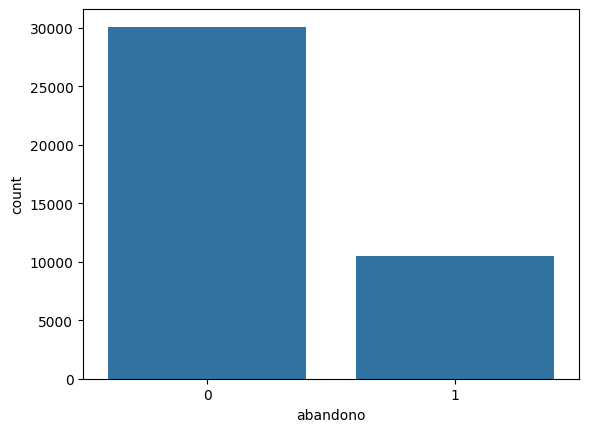

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='abandono',data=df_train)
plt.show()


Después de comprobar que los abandonos suponen más o menos un cuarto del total; procederé comprobando la relación que existe entre el resto de variables por la objetivo. Comenzaré con aquellas varibles que no necesiten ningún tipo de transformación para comprobar esto.

Hay  0  valores perdidos en 'trabaja'


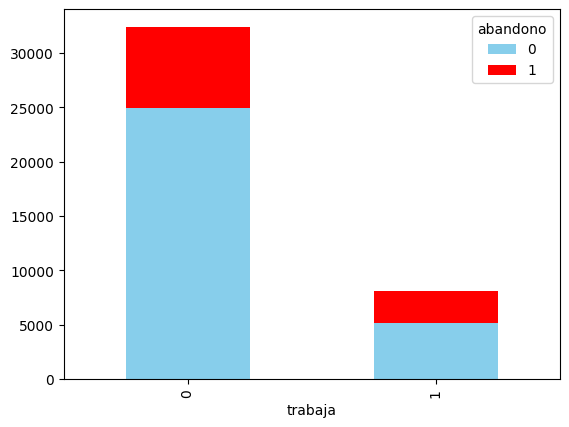

<Figure size 800x600 with 0 Axes>

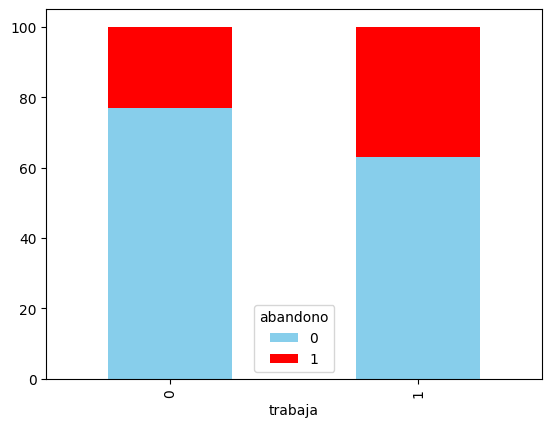

In [ ]:
# variable trabaja
perdidos = df_train['trabaja'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'trabaja'")

x = pd.crosstab(df_train['trabaja'], df_train['abandono'])
x.plot(kind='bar', stacked=True, color=['skyblue', 'red'])

plt.show()

#Ahora lo mismo, pero normalizada, para ver mejor la relación de abandonos y no abandonos

x = pd.crosstab(df_train['trabaja'], df_train['abandono'], normalize='index') * 100

plt.figure(figsize=(8, 6))
x.plot(kind='bar', stacked=True, color=['skyblue', 'red'])

plt.show()

Hay  0  valores perdidos en 'nota_acceso'


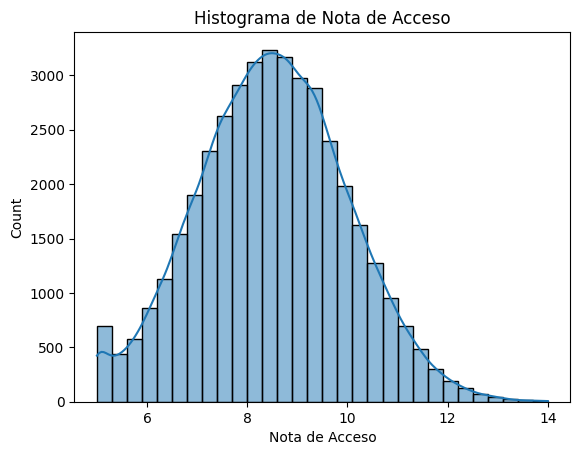

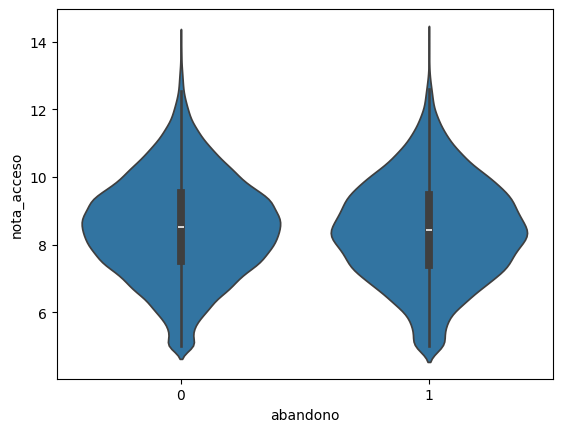

In [ ]:
# variable nota_acceso
perdidos = df_train['nota_acceso'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'nota_acceso'")

sns.histplot(df_train['nota_acceso'], bins=30, kde=True)
plt.title('Histograma de Nota de Acceso')
plt.xlabel('Nota de Acceso')
plt.show()

sns.violinplot(x='abandono', y='nota_acceso', data=df_train)
plt.show()


Hay  1061  valores perdidos en 'nota_s1'


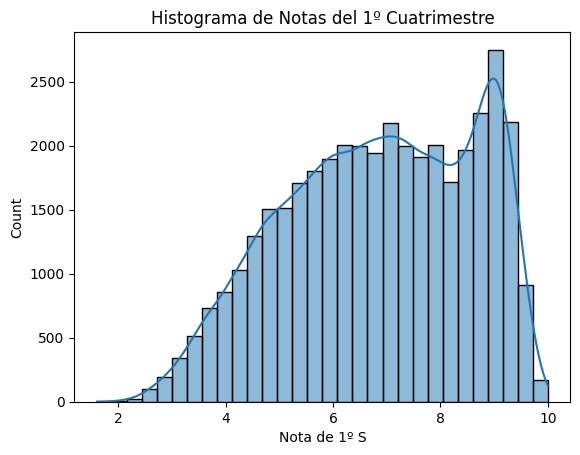

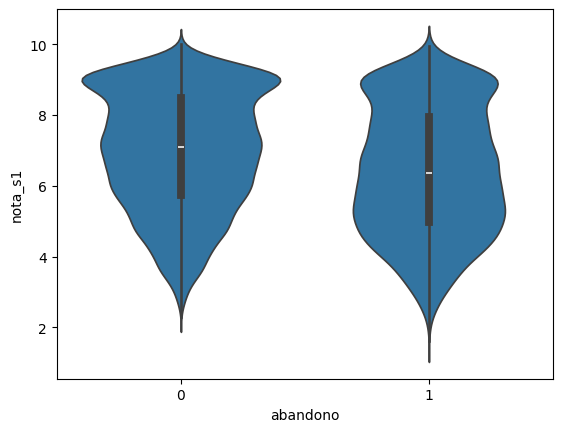

In [ ]:
# variable nota_s1
perdidos = df_train['nota_s1'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'nota_s1'")

sns.histplot(df_train['nota_s1'], bins=30, kde=True)
plt.title('Histograma de Notas del 1º Cuatrimestre')
plt.xlabel('Nota de 1º S')
plt.show()

sns.violinplot(x='abandono', y='nota_s1', data=df_train)
plt.show()

Como esta variable tiene valores perdidos, voy a realizar una pequeña transformación, para comprobar si esos valores perdidos pueden aportar algo de información. Para no modificar el dataframe original, voy a realizar una copia para realizar la transformación en ella.

In [15]:
df_copia=df_train.copy(deep=True)

df_copia['nota_s1'].fillna(-1, inplace=True)

x = df_train[df_copia['nota_s1'] == -1]

y=x.groupby('abandono').size()
print(y)

abandono
0      34
1    1027
dtype: int64


/tmp/ipykernel_602/3575583941.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia['nota_s1'].fillna(-1, inplace=True)


De las columnas con valores perdidos, hay un porcentaje mucho mayor de abandonos que de no abandonos. Esto puede tener sentido si los valores perdidos de esta variable corresponden a 'no presentado' o algo del estilo.

Hay  0  valores perdidos en 'satisfaccion'


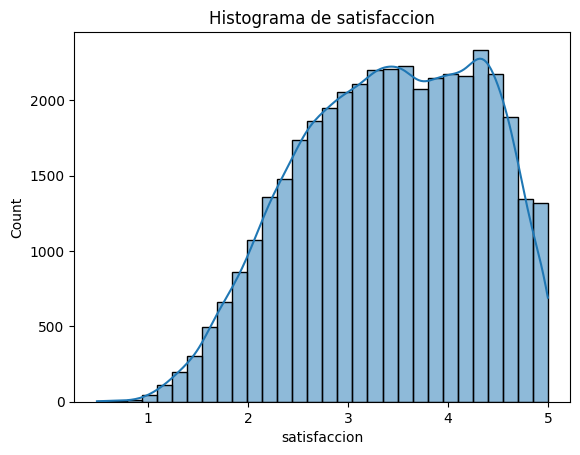

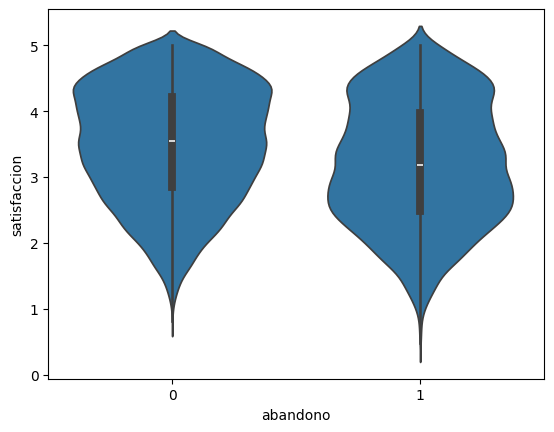

In [ ]:
# Variable satisfacción
perdidos = df_train['satisfaccion'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'satisfaccion'")

sns.histplot(df_train['satisfaccion'], bins=30, kde=True)
plt.title('Histograma de satisfaccion')
plt.xlabel('satisfaccion')
plt.show()

sns.violinplot(x='abandono', y='satisfaccion', data=df_train)
plt.show()



Puede ser interesante utilizar esta variable, especialmente en intervalos con valores bastante bajos, que es donde parece haber mayor porcentaje de abandonos que de no.

Hay  0  valores perdidos en 'posts_foro'


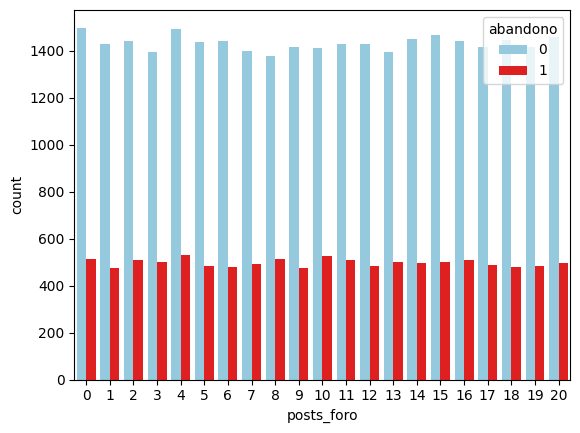

In [36]:
# variable posts_foro
perdidos = df_train['posts_foro'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'posts_foro'")

sns.countplot(data=df_train, x='posts_foro', hue='abandono', palette=['skyblue', 'red'])
plt.show()

Esta variable no parece aportar demasiada información, ya que para casi todos los valores para esta variable, hay un porcentaje muy parecido de abandonos y no abandonos.

Hay  0  valores perdidos en 'uso_biblioteca'


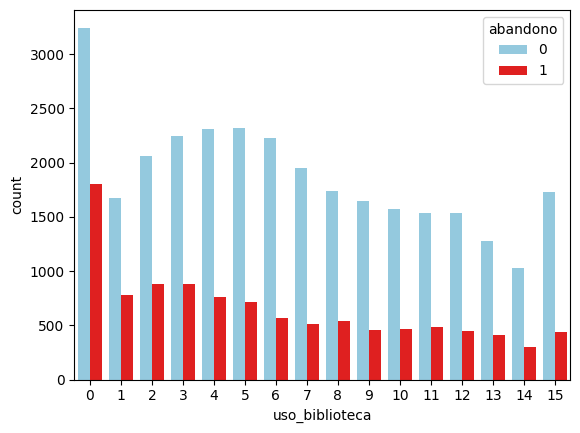

In [35]:
# variable uso_biblioteca
perdidos = df_train['uso_biblioteca'].isna().sum()
print("Hay ",perdidos, " valores perdidos en 'uso_biblioteca'")

sns.countplot(data=df_train, x='uso_biblioteca', hue='abandono', palette=['skyblue', 'red'])
plt.show()

La variable uso_biblioteca parece que puede ser útil, ya que en valores bajos, la relación abandono/no abandono es mayor que de normal, y en valores altos es menor.